<a href="https://colab.research.google.com/github/Koteswararao-1878/ADM_28/blob/main/ADM_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("scores.csv")


In [3]:
data.shape

(80, 3)

In [4]:
data.sample(5)

,Emotional_Quotient,Intelligence_Quotient,Marks
6,77,135,79
48,75,132,56
74,83,155,86
14,67,184,71
44,65,129,67


In [5]:
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.125000,145.262500,76.062500
std,6.672018,21.560479,9.195959
min,50.000000,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


<Axes: xlabel='Emotional_Quotient', ylabel='Count'>

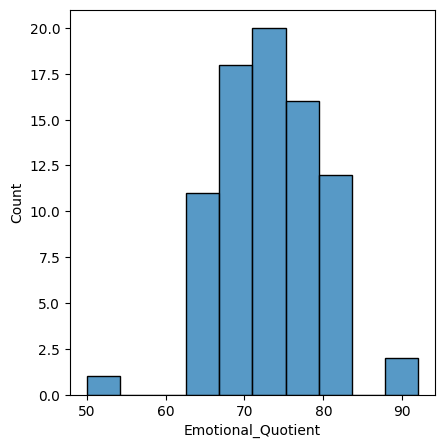

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(data['Emotional_Quotient'])

<Axes: xlabel='Intelligence_Quotient', ylabel='Count'>

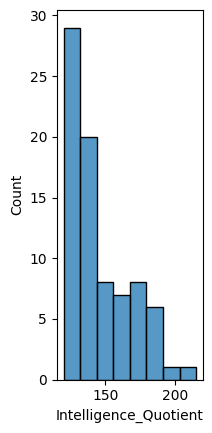

In [7]:
plt.subplot(1,3,2)
sns.histplot(data['Intelligence_Quotient'])

<Axes: xlabel='Marks', ylabel='Count'>

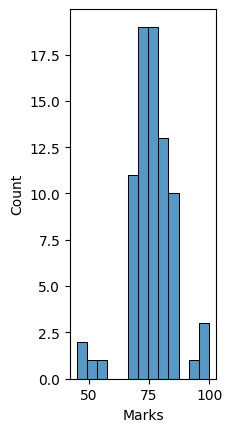

In [8]:
plt.subplot(1,3,3)
sns.histplot(data['Marks'])

In [10]:
plt.show()

In [15]:
z_score_upper_limit=data['Emotional_Quotient'].mean()+3*data['Emotional_Quotient'].std()
z_score_upper_limit


93.14105368356338

In [16]:
z_score_lower_limit=data['Emotional_Quotient'].mean()-3*data['Emotional_Quotient'].std()
z_score_lower_limit

53.108946316436615

In [19]:
data["Emotional_Quotient"]=np.where(
    data["Emotional_Quotient"]>z_score_upper_limit,
    z_score_upper_limit,
    np.where(
        data["Emotional_Quotient"]<z_score_lower_limit,
        z_score_lower_limit,
        data["Emotional_Quotient"]
    )
)
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.163862,145.262500,76.062500
std,6.543434,21.560479,9.195959
min,53.108946,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


<Axes: ylabel='Emotional_Quotient'>

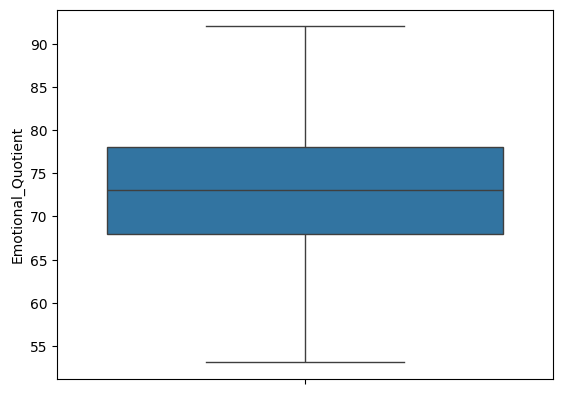

In [20]:
sns.boxplot(data['Emotional_Quotient'])

In [21]:
data["Intelligence_Quotient"].skew()

1.0638929876178798

<Axes: ylabel='Intelligence_Quotient'>

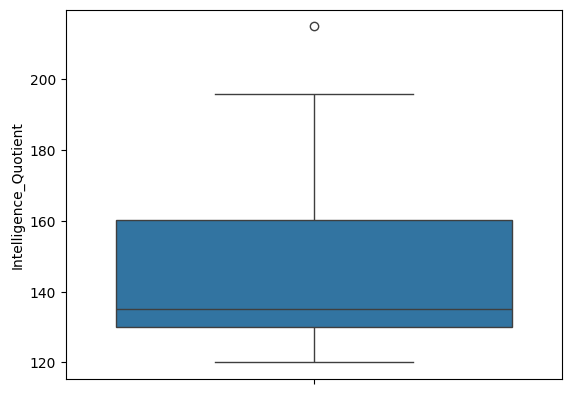

In [22]:
sns.boxplot(data['Intelligence_Quotient'])

In [27]:
percentile25=data['Intelligence_Quotient'].quantile(0.25)
percentile25


130.0

In [28]:
percentile75=data['Intelligence_Quotient'].quantile(0.75)
percentile75

160.25

In [29]:
iqr=percentile75-percentile25
iqr

30.25

In [31]:
iqr_upper_limit=percentile75+1.5*iqr
print("Upper limit",iqr_upper_limit)


Upper limit 205.625


In [32]:
iqr_lower_limit=percentile25-1.5*iqr
print("Lower limit",iqr_lower_limit)

Lower limit 84.625


In [34]:
data[data['Intelligence_Quotient']>iqr_upper_limit]

,Emotional_Quotient,Intelligence_Quotient,Marks
21,70.0,215,75


In [36]:
data[data['Intelligence_Quotient']<iqr_lower_limit]

,Emotional_Quotient,Intelligence_Quotient,Marks
